In [1]:
from __future__ import division, print_function, unicode_literals

In [12]:
import numpy as np
import os
import pandas as pd
import sklearn.linear_model

In [6]:
np.random.seed(42)

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = 'fundamentals'


import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

## Ex 1-1

In [23]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
        

In [42]:
datapath = os.path.join('datasets', 'lifesat', '')

In [43]:
datapath

'datasets/lifesat/'

In [44]:
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')

In [48]:
oecd_bli.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3292.0,0.0,0.0,3292.000000
mean,0.0,NaN,NaN,4774.392587
std,0.0,NaN,NaN,13941.537833
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,6.600000
50%,0.0,NaN,NaN,49.000000
75%,0.0,NaN,NaN,90.000000
max,0.0,NaN,NaN,145769.000000


In [57]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [58]:
oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

ValueError: Index contains duplicate entries, cannot reshape

In [60]:
oecd_bli['INEQUALITY'].describe()

count     3292
unique       5
top        TOT
freq       888
Name: INEQUALITY, dtype: object

In [63]:
oecd_bli['INEQUALITY'].unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [74]:
inequality = oecd_bli[oecd_bli['INEQUALITY'].isin(['MN', 'WMN', 'HGH', 'LW'])].sort_values(by='Value')
inequality

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
98,SWE,Sweden,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
55,NLD,Netherlands,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
91,NLD,Netherlands,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
99,CHE,Switzerland,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
62,SWE,Sweden,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
3049,LUX,Luxembourg,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,units,NaN,NaN,0.000000,NaN,NaN
3044,ISL,Iceland,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,units,NaN,NaN,0.000000,NaN,NaN
63,CHE,Switzerland,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,0.000000,E,Estimated value
2814,SVN,Slovenia,SW_LIFS,Life satisfaction,L,Value,HGH,High,AVSCORE,Average score,0,units,NaN,NaN,0.000000,NaN,NaN
1004,KOR,Korea,JE_LTUR,Long-term unemployment rate,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,0.006482,NaN,NaN


In [50]:
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [54]:
gdp_per_capita.describe()

,2015,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


In [52]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [25]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

KeyError: 'Country'

In [26]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [28]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

In [29]:
country_stats['GDP per capita']

Country
Russia              9054.914
Turkey              9437.372
Hungary            12239.894
Poland             12495.334
Slovak Republic    15991.736
Estonia            17288.083
Greece             18064.288
Portugal           19121.592
Slovenia           20732.482
Spain              25864.721
Korea              27195.197
Italy              29866.581
Japan              32485.545
Israel             35343.336
New Zealand        37044.891
France             37675.006
Belgium            40106.632
Germany            40996.511
Finland            41973.988
Canada             43331.961
Netherlands        43603.115
Austria            43724.031
United Kingdom     43770.688
Sweden             49866.266
Iceland            50854.583
Australia          50961.865
Ireland            51350.744
Denmark            52114.165
United States      55805.204
Name: GDP per capita, dtype: float64

In [30]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [31]:
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

In [34]:
country_stats['Life satisfaction']

Country
Russia             6.0
Turkey             5.6
Hungary            4.9
Poland             5.8
Slovak Republic    6.1
Estonia            5.6
Greece             4.8
Portugal           5.1
Slovenia           5.7
Spain              6.5
Korea              5.8
Italy              6.0
Japan              5.9
Israel             7.4
New Zealand        7.3
France             6.5
Belgium            6.9
Germany            7.0
Finland            7.4
Canada             7.3
Netherlands        7.3
Austria            6.9
United Kingdom     6.8
Sweden             7.2
Iceland            7.5
Australia          7.3
Ireland            7.0
Denmark            7.5
United States      7.2
Name: Life satisfaction, dtype: float64

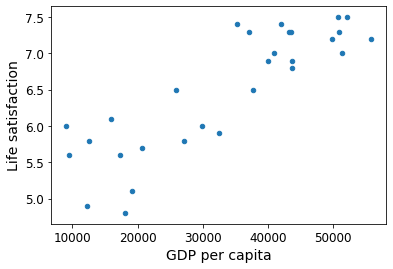

In [36]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [38]:
model = sklearn.linear_model.LinearRegression()

In [39]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


## Some Pandas


In [41]:
?pd.DataFrame.iloc